In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
%matplotlib inline

## Load the Data

In [2]:
data = np.loadtxt('ex2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
pd.DataFrame(data).head()

,0,1,2
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


## Plot the Data

In [3]:
def plotData(X, y):
    """
    Plots the data points with '+' for the positive examples and 'o' for the negative examples.
    X is assumed to be a Mx2 matrix.
    """
    # Find Indices of Positive and Negative Examples
    pos = X[np.where(y == 1)].T
    neg = X[np.where(y == 0)].T

    plt.plot(pos[0], pos[1], 'k+', linewidth='2', markersize='7')
    plt.plot(neg[0], neg[1], 'ko', markerfacecolor='y', markersize='7')

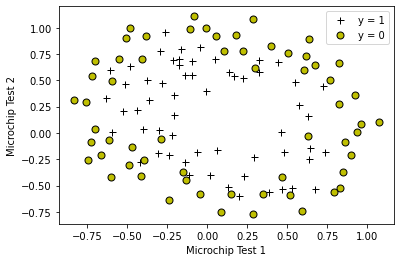

In [4]:
plotData(X, y)

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.show()

## Feature Mapping

In [5]:
def mapFeature(X1, X2):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features.
    Inputs X1, X2 must be the same size.
    """
    m = X1.size
    
    degree = 6
    out = np.c_[np.ones(m)]
    
    for i in range(1, degree+1):
        for j in range(i+1):
            terms = (X1 ** (i - j) * X2 ** j)
            out = np.c_[out, terms]

    return out

In [6]:
# Updates X with more features
X = mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 28)

## Sigmoid Function

In [7]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    """
    g = 1 / (1 + np.exp(-z))
    return g

## Regularized Cost

In [8]:
def compute_cost(theta, X, y, lamb):
    """
    Computes the cost of using theta as the parameter for regularized logistic regression
    """
    # Compute Sigmoid of X * theta
    h = sigmoid(X.dot(theta))
    # Unregularized cost
    J = 1/m * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    
    # Ignores theta_0
    theta = theta[1:]
    # Regularization Parameter
    reg = lamb / (2*m) * np.sum(theta ** 2)
    # Regularized cost
    J = J + reg
    return J

## Regularized Gradient

In [9]:
def compute_grad(theta, X, y, lamb):
    """
    Computes the gradient of using theta as the parameter for regularized logistic regression
    w.r.t to the parameters.
    """
    # # Compute Sigmoid of X * theta
    h = sigmoid(X.dot(theta))
    # Unregularized gradient
    grad = (1/m) * X.T.dot(h-y)
    
    # Ignores theta_0
    theta = theta[1:]
    # Regularized gradient
    grad[1:] = grad[1:] + (lamb/m) * theta
    return grad

## Compute Regularized Cost & Gradient

In [10]:
m, n = X.shape

**Theta all zero and Lambda = 1**

In [11]:
lamb = 1
initial_theta = np.zeros((n, 1))

In [12]:
z_cost, z_grad = compute_cost(initial_theta, X, y, lamb), compute_grad(initial_theta, X, data[:, [2]], lamb)

In [13]:
print("Cost at Initial theta(zeros): {:.3f}".format(z_cost[0]))

Cost at Initial theta(zeros): 0.693


In [14]:
print('Gradient at initial theta (zeros) - first five values only:');
for i in range(5):
    print("\t{:.4f}".format(z_grad[i][0]))

Gradient at initial theta (zeros) - first five values only:
	0.0085
	0.0188
	0.0001
	0.0503
	0.0115


**Theta all one and Lambda = 10**

In [15]:
test_theta = np.ones((n, 1))
lamb = 10

In [16]:
o_cost, o_grad = compute_cost(test_theta, X, y, lamb), compute_grad(test_theta, X, data[:, [2]], lamb)

In [17]:
print("Cost at test theta (with lambda=10): {:.2f}".format(o_cost[0]))

Cost at test theta (with lambda=10): 3.16


In [18]:
print('Gradient at test theta (zeros) - first five values only:');
for i in range(5):
    print("\t{:.4f}".format(o_grad[i][0]))

Gradient at test theta (zeros) - first five values only:
	0.3460
	0.1614
	0.1948
	0.2269
	0.0922


## `fmin_bfgs`

In [19]:
def f_cost(theta):
    return compute_cost(theta, X, y, lamb).flatten()

In [20]:
def f_grad(theta):
    return compute_grad(theta, X, y, lamb).flatten()

In [21]:
lamb = 1
theta = fmin_bfgs(f_cost, initial_theta, f_grad)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


In [22]:
theta = theta.reshape(n, 1)
print('Gradient using fmin_bfgs - first five values only:');
for i in range(5):
    print("\t{:.4f}".format(theta[i][0]))

Gradient using fmin_bfgs - first five values only:
	1.2727
	0.6256
	1.1810
	-2.0192
	-0.9176


## Plotting Decision Boundary

In [23]:
def plotDecBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    # Feature Mapping
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = mapFeature(u[i], v[j]).dot(theta)
    
    # Transpose 'z'
    z = z.T
    
    # Find Indices of Positive and Negative Examples
    pos = X[np.where(y == 1)].T
    neg = X[np.where(y == 0)].T
    
    # Plot
    fig, ax = plt.subplots()
    cnt = ax.contour(u, v, z, 0)
    p_pos, = ax.plot(pos[0], pos[1], 'k+', linewidth='2', markersize='7')
    p_neg, = ax.plot(neg[0], neg[1], 'ko', markerfacecolor='y', markersize='7')
    
    # Legend, Labels, and Title
    h1,_ = cnt.legend_elements()
    ax.legend([p_pos, p_neg, h1[1]], ['y = 1', 'y = 0', 'Decision Boundary'])
    ax.set_title('lambda = {}'.format(lamb))
    ax.set_xlabel("Microchip Test 1")
    ax.set_ylabel("Microchip Test 2")

#### Plot with different lambda

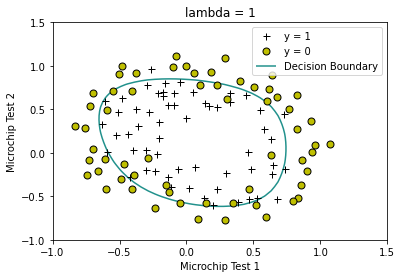

In [24]:
plotDecBoundary(theta, data[:, :2], y)

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


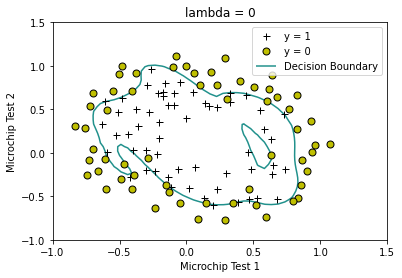

In [25]:
lamb = 0
theta = fmin_bfgs(f_cost, initial_theta, f_grad)
plotDecBoundary(theta, data[:, :2], y)

Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


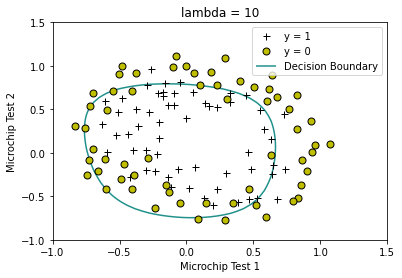

In [26]:
lamb = 10
theta = fmin_bfgs(f_cost, initial_theta, f_grad)
plotDecBoundary(theta, data[:, :2], y)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


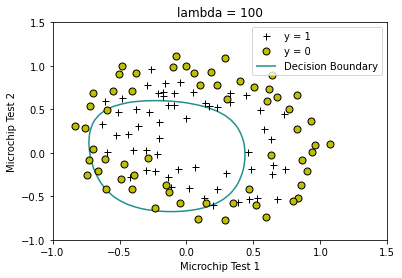

In [27]:
lamb = 100
theta = fmin_bfgs(f_cost, initial_theta, f_grad)
plotDecBoundary(theta, data[:, :2], y)

## Train Accuracy

In [28]:
lamb = 1 # Best lambda is 1
theta = fmin_bfgs(f_cost, initial_theta, f_grad)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


In [29]:
def predict(theta, X):
    h = sigmoid(X.dot(theta))
    h = h >= 0.5
    return h

In [30]:
accuracy = np.mean(predict(theta, X) == y) * 100
print("Train Accuracy: {:.6f}".format(accuracy))

Train Accuracy: 83.050847
